In [2]:
!pip install yfinance


/tmp/ipython-input-2841554857.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start="2019-01-01")
[*********************100%***********************]  1 of 1 completed


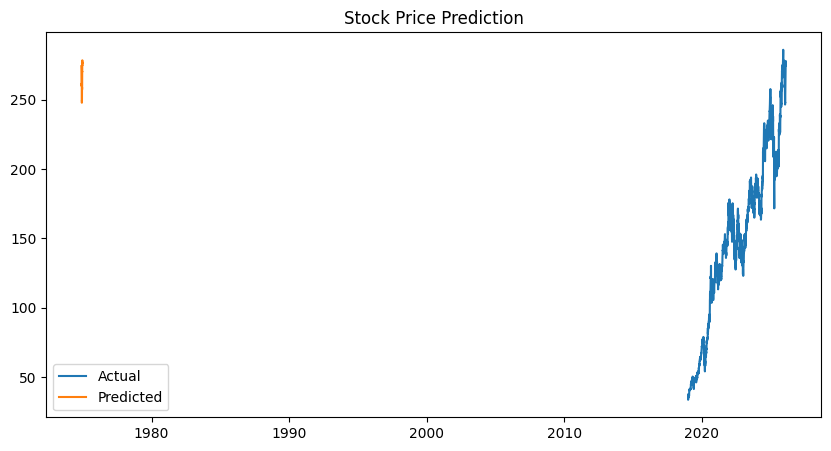

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

stock = "AAPL"
data = yf.download(stock, start="2019-01-01")


data = data[['Close']]
data['Prediction'] = data['Close'].shift(-30)

X = np.array(data[['Close']])[:-30]
y = np.array(data['Prediction'])[:-30]


model = LinearRegression()
model.fit(X, y)


x_future = np.array(data[['Close']])[-30:]
predictions = model.predict(x_future)

plt.figure(figsize=(10,5))
plt.plot(data['Close'], label="Actual")
plt.plot(range(len(data), len(data)+30), predictions, label="Predicted")
plt.legend()
plt.title("Stock Price Prediction")
plt.show()
